### <div class="alert alert-block alert-info"> [Part1] 미디어파이프를 이용한 얼굴인식
- face_detection을 이용하여서 얼굴의 6가지 랜드마크를 인식합니다. (눈2, 코,입, 귀2)

In [2]:
# !pip install mediapipe
# # -> 오류 발생

# git clone https://github.com/google/mediapipe.git

ERROR: Could not find a version that satisfies the requirement mediapipe (from versions: none)
ERROR: No matching distribution found for mediapipe


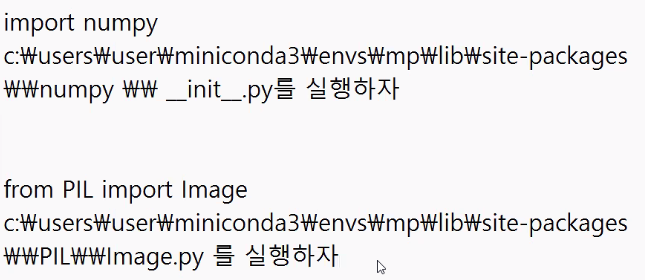
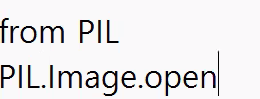
이 명령어도 가능

Name: mediapipe
Version: 0.8.11
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: c:\users\bluecom009\miniconda3\envs\mp\lib\site-packages
Requires: absl-py, attrs, matplotlib, numpy, opencv-contrib-python, protobuf
Required-by: 


커널 설정을 변경해서 오류 해결..

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_detection=mp.solutions.face_detection
mp_drawing=mp.solutions.drawing_utils


IMAGE_FILES=['./img/sample.jpg']

with mp_face_detection.FaceDetection(   #face_detection -> 근거리에서 얼굴 인식을 더 잘 할 수 있는
    
    ### selection=1은 5m 이내의 전신, 0은 2m 이내의 사진, 기본값은 0
    model_selection=1, min_detection_confidence=0.5) as face_detection:
        
    for idx, file in enumerate(IMAGE_FILES):
        image=cv2.imread(file)
        results=face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
              
        if not results.detections:
            print("Face not found in image")
        else: 
            print(len(results.detections))
            print(results.detections)
           
   

2
[label_id: 0
score: 0.8429038524627686
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.40623968839645386
    ymin: 0.27737605571746826
    width: 0.07183575630187988
    height: 0.10767686367034912
  }
  relative_keypoints {
    x: 0.42865097522735596
    y: 0.30971527099609375
  }
  relative_keypoints {
    x: 0.45559221506118774
    y: 0.3098941445350647
  }
  relative_keypoints {
    x: 0.4391864538192749
    y: 0.3332650661468506
  }
  relative_keypoints {
    x: 0.44185671210289
    y: 0.35496944189071655
  }
  relative_keypoints {
    x: 0.4193357527256012
    y: 0.324726402759552
  }
  relative_keypoints {
    x: 0.47998714447021484
    y: 0.32117992639541626
  }
}
, label_id: 0
score: 0.7307496666908264
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.2537979483604431
    ymin: 0.29274868965148926
    width: 0.08250665664672852
    height: 0.1237339973449707
  }
  relative_keypoints {
    x: 0.28104448

### <div class="alert alert-block alert-info"> [Part2] 인식된 얼굴에 박스를 그림
- 근거리 원거리에 대하여서 

0-->./img\dog.png:1count


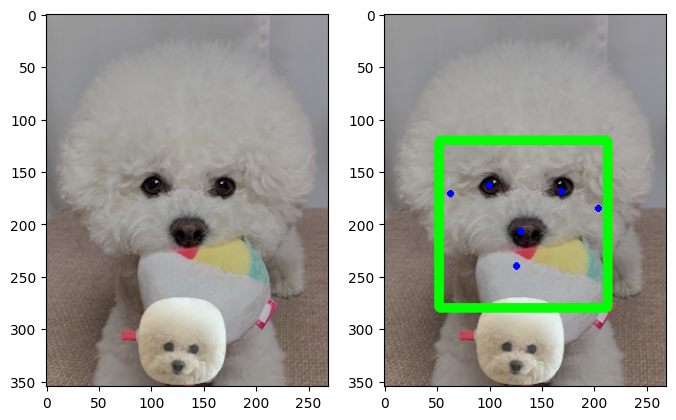

1-->./img\long.png:Face not found in image
2-->./img\sample.jpg:Face not found in image
3-->./img\short.jpg:1count


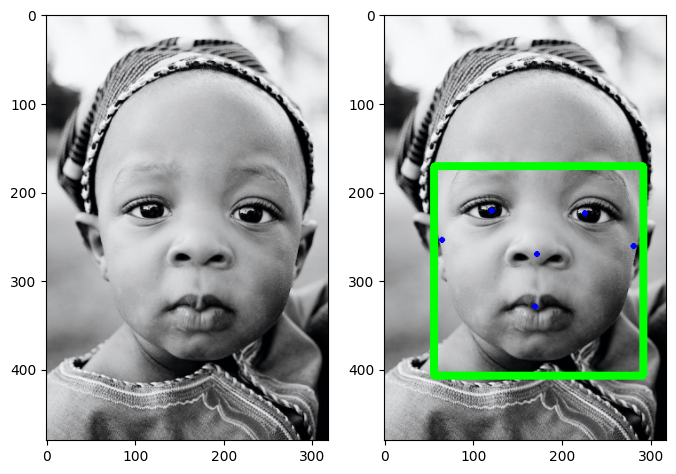

In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from glob import glob

mp_face_detection=mp.solutions.face_detection
mp_drawing=mp.solutions.drawing_utils


IMAGE_FILES=glob('./img/*.*')

with mp_face_detection.FaceDetection(
    
    ### selection=1은 5m 이내의 전신, 0은 2m 이내의 사진, 기본값은 0
    model_selection=0, min_detection_confidence=0.5) as face_detection:
        
    for idx, file in enumerate(IMAGE_FILES):
        image=cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results=face_detection.process(image)
       
              
        if not results.detections:

            print(str(idx) + '-->'+ file + ':Face not found in image')
            
        else: 
            print(str(idx) + '-->'+  file + ':'+ str(len(results.detections)) + 'count')
            annotated_image = image.copy()
            for detection in results.detections:
                mp_drawing.draw_detection(annotated_image, detection, 
                                          bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))
        
            plt.figure(figsize=(8,20))
            plt.subplot(1,2,1);plt.imshow(image)
            plt.subplot(1,2,2);plt.imshow(annotated_image)
            plt.show()
            
            
           

### <div class="alert alert-block alert-info"> [Part2] 눈,코,입,귀등 포인트 위치값 출력
- 

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_detection=mp.solutions.face_detection
mp_drawing=mp.solutions.drawing_utils


IMAGE_FILES=['./img/short.jpg']

with mp_face_detection.FaceDetection(
    
    ### selection=1은 5m 이내의 전신, 0은 2m 이내의 사진, 기본값은 0
    model_selection=0, min_detection_confidence=0.5) as face_detection:
        
    for idx, file in enumerate(IMAGE_FILES):
        image=cv2.imread(file)
        results=face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
              
        if not results.detections:
            print("Face not found in image")
        else: 
            print(len(results.detections)) # 얼굴인식 갯수 출력
            
            for detection in results.detections:
                    
                    for x in detection.location_data.relative_keypoints:
                        print('-'*50)
                        print(x)
                    
                

ModuleNotFoundError: No module named 'mediapipe'

### <div class="alert alert-block alert-info"> [Part3] FaceKeyPoint를 이용하여 지정한 객체값 위치만 출력

In [6]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_detection=mp.solutions.face_detection
mp_drawing=mp.solutions.drawing_utils


IMAGE_FILES=['./img/short.jpg']
xList=['RIGHT_EYE','LEFT_EYE','NOSE_TIP','MOUTH_CENTER','RIGHT_EAR_TRAGION','LEFT_EAR_TRAGION']

with mp_face_detection.FaceDetection(
    
    ### selection=1은 5m 이내의 전신, 0은 2m 이내의 사진, 기본값은 0
    model_selection=0, min_detection_confidence=0.5) as face_detection:
        
    for idx, file in enumerate(IMAGE_FILES):
        image=cv2.imread(file)
        results=face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
              
        if not results.detections:
            print("Face not found in image")
        else: 
            print(len(results.detections)) # 얼굴인식 갯수 출력
            
            for x in range(6):
                print('-->'+ xList[x])
                print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint(x)))  
             
            

1
-->RIGHT_EYE
x: 0.3815946877002716
y: 0.46129289269447327

-->LEFT_EYE
x: 0.7119122743606567
y: 0.4675918221473694

-->NOSE_TIP
x: 0.5428836345672607
y: 0.5638480186462402

-->MOUTH_CENTER
x: 0.5366237163543701
y: 0.6869577765464783

-->RIGHT_EAR_TRAGION
x: 0.20462587475776672
y: 0.5311298966407776

-->LEFT_EAR_TRAGION
x: 0.885663628578186
y: 0.544664204120636



### <div class="alert alert-block alert-info"> [Part4] 웹캠으로 지정하기
- 

In [7]:
import cv2
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

dataList=[]
cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(
    model_selection=0, min_detection_confidence=0.5) as face_detection:
  
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      continue

   
   
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_detection.process(image)

  
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.detections:
      for detection in results.detections:
        mp_drawing.draw_detection(image, detection)
   
    cv2.imshow('MediaPipe Face Detection', cv2.flip(image, 1))
    
    dataList.append(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint(x)))  
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
      cap.release() 
      cv2.destroyAllWindows()
      break

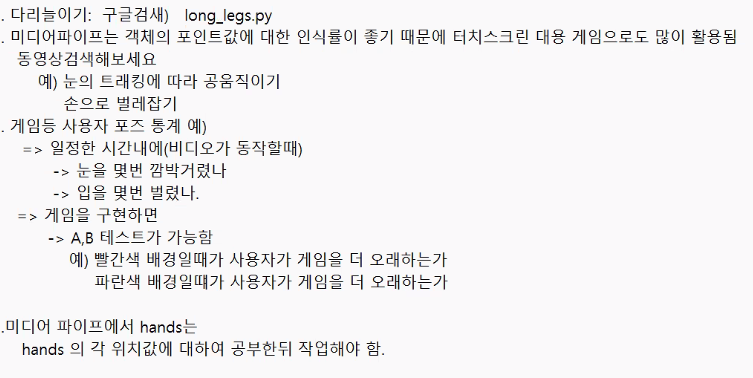

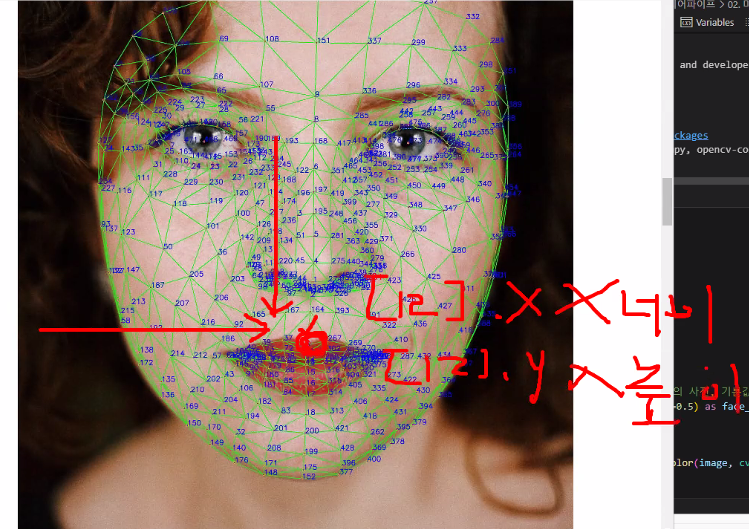

해당위치의 점을 찍으면 x, y값의 좌표값이 나오게 됨

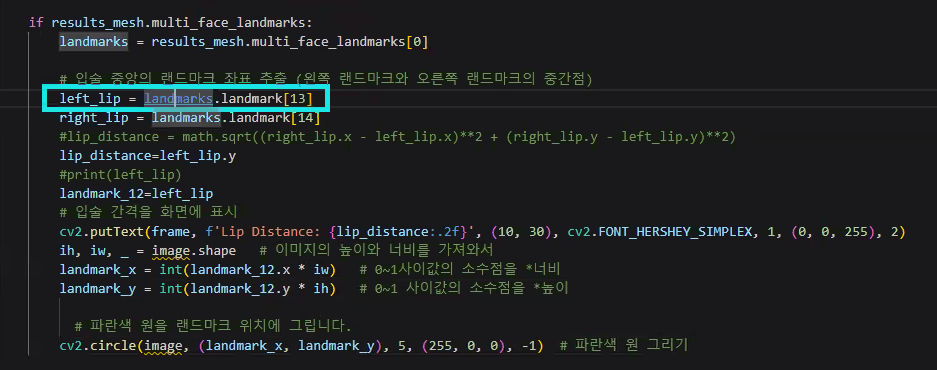

In [8]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프의 Hands 모듈 초기화
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# 웹캠 열기
cap = cv2.VideoCapture(0)

# 손 감지 모델 초기화
with mp_hands.Hands(static_image_mode=False, max_num_hands=1) as hands:
    # 초기 연필 색상 지정
    pencil_color = (255, 255, 255)  # 흰색
    erase_color = (0, 0, 0)  # 검은색
    colors = [(255, 255, 255), (0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]
    drawing_color = pencil_color

    while cap.isOpened():
        # 프레임 읽기
        ret, frame = cap.read()
        if not ret:
            continue

        # BGR 이미지를 RGB 이미지로 변환
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 손 감지 수행
        results = hands.process(rgb_frame)

        # 감지된 손이 있으면
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # 검지 손가락 끝 위치 가져오기
                x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * frame.shape[1])
                y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame.shape[0])

                # 색상 원 표시
                for i, color in enumerate(colors):
                    cv2.circle(frame, (50 + i * 50, 50), 20, color, -1)

                # 색상 선택 여부 확인
                for i, color in enumerate(colors):
                    distance = np.sqrt((x - (50 + i * 50))**2 + (y - 50)**2)
                    if distance < 20:  # 손가락이 색상 원 위에 있으면 해당 색상 선택
                        drawing_color = color
                        break

                # 손의 중지 랜드마크를 이용하여 원 그리기
                cv2.circle(frame, (x, y), 10, drawing_color, -1)

                # 화면에 현재 선택된 색상 표시
                cv2.circle(frame, (50 + len(colors) * 50 + 25, 50), 20, drawing_color, -1)

        # 화면에 출력
        cv2.imshow('Hand Tracking and Drawing', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 작업 완료 후 리소스 해제
cap.release()
cv2.destroyAllWindows()


In [9]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프의 Hands 모듈 초기화
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# 웹캠 열기
cap = cv2.VideoCapture(0)

# 손 감지 모델 초기화
with mp_hands.Hands(static_image_mode=False, max_num_hands=1) as hands:
    # 초기 연필 색상 지정
    pencil_color = (255, 255, 255)  # 흰색
    erase_color = (0, 0, 0)  # 검은색
    colors = [(255, 255, 255), (0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]
    drawing_color = pencil_color

    # 이전 손 위치 저장
    prev_x, prev_y = None, None

    while cap.isOpened():
        # 프레임 읽기
        ret, frame = cap.read()
        if not ret:
            continue

        # BGR 이미지를 RGB 이미지로 변환
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 손 감지 수행
        results = hands.process(rgb_frame)

        # 감지된 손이 있으면
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # 검지 손가락 끝 위치 가져오기
                x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * frame.shape[1])
                y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame.shape[0])

                # 색상 선택 여부 확인
                for i, color in enumerate(colors):
                    distance = np.sqrt((x - (50 + i * 50))**2 + (y - 50)**2)
                    if distance < 20:  # 손가락이 색상 원 위에 있으면 해당 색상 선택
                        drawing_color = color
                        break

                # 선 그리기
                if prev_x is not None and prev_y is not None:
                    cv2.line(frame, (prev_x, prev_y), (x, y), drawing_color, 10)

                # 현재 위치 저장
                prev_x, prev_y = x, y

                # 손의 중지 랜드마크를 이용하여 원 그리기
                cv2.circle(frame, (x, y), 10, drawing_color, -1)

                # 화면에 현재 선택된 색상 표시
                cv2.circle(frame, (50 + len(colors) * 50 + 25, 50), 20, drawing_color, -1)

        else:
            # 만약 손이 감지되지 않으면 이전 위치 초기화
            prev_x, prev_y = None, None

        # 화면에 출력
        cv2.imshow('Hand Tracking and Drawing', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 작업 완료 후 리소스 해제
cap.release()
cv2.destroyAllWindows()


In [10]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프의 Hands 모듈 초기화
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# 웹캠 열기
cap = cv2.VideoCapture(0)

# 손 감지 모델 초기화
with mp_hands.Hands(static_image_mode=False, max_num_hands=1) as hands:
    # 초기 연필 색상 지정
    pencil_color = (255, 255, 255)  # 흰색
    erase_color = (0, 0, 0)  # 검은색
    colors = [(255, 255, 255), (0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]
    drawing_color = pencil_color

    # 이전 손 위치 저장
    prev_x, prev_y = None, None

    # 손이 화면에 있는지 여부를 추적하는 변수
    hand_present = False

    while cap.isOpened():
        # 프레임 읽기
        ret, frame = cap.read()
        if not ret:
            continue

        # BGR 이미지를 RGB 이미지로 변환
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 손 감지 수행
        results = hands.process(rgb_frame)

        # 감지된 손이 있으면
        if results.multi_hand_landmarks:
            hand_present = True
            for hand_landmarks in results.multi_hand_landmarks:
                # 검지 손가락 끝 위치 가져오기
                x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * frame.shape[1])
                y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame.shape[0])

                # 색상 선택 여부 확인
                for i, color in enumerate(colors):
                    distance = np.sqrt((x - (50 + i * 50))**2 + (y - 50)**2)
                    if distance < 20:  # 손가락이 색상 원 위에 있으면 해당 색상 선택
                        drawing_color = color
                        break

                # 선 그리기
                if prev_x is not None and prev_y is not None:
                    cv2.line(frame, (prev_x, prev_y), (x, y), drawing_color, 10)

                # 현재 위치 저장
                prev_x, prev_y = x, y

                # 손의 중지 랜드마크를 이용하여 원 그리기
                cv2.circle(frame, (x, y), 10, drawing_color, -1)

                # 화면에 현재 선택된 색상 표시
                cv2.circle(frame, (50 + len(colors) * 50 + 25, 50), 20, drawing_color, -1)
        else:
            if hand_present:
                # 손이 화면에 있었으면 손이 사라질 때까지 이전 그림을 유지
                hand_present = False
                prev_x, prev_y = None, None

        # 화면에 출력
        cv2.imshow('Hand Tracking and Drawing', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 작업 완료 후 리소스 해제
cap.release()
cv2.destroyAllWindows()


In [12]:
# !pip install pytesseract

- tesseract OCR 실행 파일 경로를 path 환경변수에 추가해줘야 함.   
그 뒤 pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
를 설정해줘야 함.

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pytesseract

# 미디어파이프의 Hands 모듈 초기화
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# 웹캠 열기
cap = cv2.VideoCapture(0)

# 손 감지 모델 초기화
with mp_hands.Hands(static_image_mode=False, max_num_hands=1) as hands:
    # 초기 연필 색상 지정
    pencil_color = (255, 255, 255)  # 흰색
    erase_color = (0, 0, 0)  # 검은색
    colors = [(255, 255, 255), (0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]
    drawing_color = pencil_color

    # 이전 손 위치 저장
    prev_x, prev_y = None, None

    # 손이 화면에 있는지 여부를 추적하는 변수
    hand_present = False

    # 그림을 저장할 이미지
    canvas = np.zeros((480, 640, 3), dtype=np.uint8)

    while cap.isOpened():
        # 프레임 읽기
        ret, frame = cap.read()
        if not ret:
            continue

        # BGR 이미지를 RGB 이미지로 변환
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 손 감지 수행
        results = hands.process(rgb_frame)

        # 감지된 손이 있으면
        if results.multi_hand_landmarks:
            hand_present = True
            for hand_landmarks in results.multi_hand_landmarks:
                # 검지 손가락 끝 위치 가져오기
                x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * frame.shape[1])
                y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame.shape[0])

                # 색상 선택 여부 확인
                for i, color in enumerate(colors):
                    distance = np.sqrt((x - (50 + i * 50))**2 + (y - 50)**2)
                    if distance < 20:  # 손가락이 색상 원 위에 있으면 해당 색상 선택
                        drawing_color = color
                        break

                # 선 그리기
                if prev_x is not None and prev_y is not None:
                    cv2.line(canvas, (prev_x, prev_y), (x, y), drawing_color, 10)

                # 현재 위치 저장
                prev_x, prev_y = x, y

                # 손의 중지 랜드마크를 이용하여 원 그리기
                cv2.circle(canvas, (x, y), 10, drawing_color, -1)

                # 화면에 현재 선택된 색상 표시
                cv2.circle(frame, (50 + len(colors) * 50 + 25, 50), 20, drawing_color, -1)
        else:
            if hand_present:
                # 손이 화면에 있었으면 손이 사라질 때까지 이전 그림을 유지
                hand_present = False
                prev_x, prev_y = None, None

        # 텍스트 인식 (OCR)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        text = pytesseract.image_to_string(gray_frame, config='--psm 6 -l eng+kor')

        # 화면에 텍스트 표시
        cv2.putText(frame, text, (50, frame.shape[0] - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # 그림을 현재 프레임에 덧씌움
        frame = cv2.addWeighted(frame, 1, canvas, 1, 0)

        # 화면에 출력
        cv2.imshow('Hand Tracking and Drawing', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 작업 완료 후 리소스 해제
cap.release()
cv2.destroyAllWindows()


In [10]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프의 Hands 모듈 초기화
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# 웹캠 열기
cap = cv2.VideoCapture(0)

# 손 감지 모델 초기화
with mp_hands.Hands(static_image_mode=False, max_num_hands=1) as hands:
    # 이전 손 위치 저장
    prev_x, prev_y = None, None

    # 그림을 저장할 이미지
    canvas = np.zeros((480, 640, 3), dtype=np.uint8)

    while cap.isOpened():
        # 프레임 읽기
        ret, frame = cap.read()
        if not ret:
            continue

        # BGR 이미지를 RGB 이미지로 변환
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 손 감지 수행
        results = hands.process(rgb_frame)

# 감지된 손이 있으면
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # 검지와 중지 손가락 끝 위치 가져오기
                index_finger_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * frame.shape[1])
                index_finger_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame.shape[0])

                middle_finger_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * frame.shape[1])
                middle_finger_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * frame.shape[0])

                # 손가락 두 개를 펴고 있으면 그림 그리는 동작 멈추기
                if (
                    hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y > hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y and
                    hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y > hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y
                ):
                    prev_index_x, prev_index_y = None, None
                    prev_middle_x, prev_middle_y = None, None
                    continue

                # 다섯 손가락을 다 펴면 그림 지우기
                elif (
                    hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y > hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y and
                    hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y > hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y and
                    hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y > hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y and
                    hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y > hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y
                ):
                    canvas = np.zeros_like(canvas)
                    fist_closed = True

                # 그림 그리기
                else:
                    if prev_index_x is not None and prev_index_y is not None:
                        cv2.line(canvas, (prev_index_x, prev_index_y), (index_finger_x, index_finger_y), (255, 255, 255), 10)
                    if prev_middle_x is not None and prev_middle_y is not None:
                        cv2.line(canvas, (prev_middle_x, prev_middle_y), (middle_finger_x, middle_finger_y), (255, 255, 255), 10)

                # 현재 위치 저장
                prev_index_x, prev_index_y = index_finger_x, index_finger_y
                prev_middle_x, prev_middle_y = middle_finger_x, middle_finger_y

        # 그린 부분을 현재 프레임에 덧씌움
        frame = cv2.addWeighted(frame, 1, canvas, 1, 0)

        # 화면에 출력
        cv2.imshow('Handwriting Recognition', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 작업 완료 후 리소스 해제
cap.release()
cv2.destroyAllWindows()


In [14]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프의 Hands 모듈 초기화
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# 웹캠 열기
cap = cv2.VideoCapture(0)

# 손 감지 모델 초기화
with mp_hands.Hands(static_image_mode=False, max_num_hands=1) as hands:
    # 이전 손 위치 저장
    prev_index_x, prev_index_y = None, None

    # 그림을 저장할 이미지
    canvas = np.zeros((480, 640, 3), dtype=np.uint8)

    # 그림을 그리는 동작을 유지할 변수
    drawing = False

    while cap.isOpened():
        # 프레임 읽기
        ret, frame = cap.read()
        if not ret:
            continue

        # BGR 이미지를 RGB 이미지로 변환
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 손 감지 수행
        results = hands.process(rgb_frame)

        # 감지된 손이 있으면
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # 검지 손가락 끝 위치 가져오기
                index_finger_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * frame.shape[1])
                index_finger_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame.shape[0])

                # 손을 쥐면 그림 지우기
                if hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y > hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y:
                    canvas = np.zeros_like(canvas)
                    prev_index_x, prev_index_y = None, None
                    drawing = False

                # 검지 손가락을 펴면 그림 그리기 시작
                elif hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y < hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y:
                    drawing = True

                # 그림 그리기
                if drawing:
                    if prev_index_x is not None and prev_index_y is not None:
                        cv2.line(canvas, (prev_index_x, prev_index_y), (index_finger_x, index_finger_y), (255, 255, 255), 10)

                # 현재 위치 저장
                prev_index_x, prev_index_y = index_finger_x, index_finger_y

        # 그린 부분을 현재 프레임에 덧씌움
        frame = cv2.addWeighted(frame, 1, canvas, 1, 0)

        # 화면에 출력
        cv2.imshow('Handwriting Recognition', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 작업 완료 후 리소스 해제
cap.release()
cv2.destroyAllWindows()


In [6]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프의 Hands 모듈 초기화
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# 웹캠 열기
cap = cv2.VideoCapture(0)

# 손 감지 모델 초기화
with mp_hands.Hands(static_image_mode=False, max_num_hands=1) as hands:
    # 이전 손 위치 저장
    prev_index_x, prev_index_y = None, None

    # 그림을 저장할 이미지
    canvas = np.zeros((480, 640, 3), dtype=np.uint8)

    # 그림을 그리는 동작을 유지할 변수
    drawing = False

    while cap.isOpened():
        # 프레임 읽기
        ret, frame = cap.read()
        if not ret:
            continue

        # BGR 이미지를 RGB 이미지로 변환
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 좌우 반전
        frame = cv2.flip(frame, 1)

        # 손 감지 수행
        results = hands.process(rgb_frame)

        # 감지된 손이 있으면
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # 검지 손가락 끝 위치 가져오기
                index_finger_x = int((1-hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x) * frame.shape[1])
                index_finger_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame.shape[0])

                # 손을 쥐면 그림 지우기
                if hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y > hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y:
                    canvas = np.zeros_like(canvas)
                    prev_index_x, prev_index_y = None, None
                    drawing = False

                # 검지 손가락을 펴면 그림 그리기 시작
                elif hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y < hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y:
                    # 중지 손가락을 펴도 그림 그리기를 멈추게 함
                    if hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y < hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y:
                        drawing = False
                    else:
                        drawing = True

                    
                    # 텍스트 인식 (OCR) 이상해요..
                    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                    # 텍스트 인식 (OCR)
                    text = pytesseract.image_to_string(gray_frame, config='--psm 6 -l eng')

                    # 알파벳만 남기기
                    filtered_text = re.sub(r'[^a-zA-Z]', '', text)
                    print("Recognized Text:", filtered_text)

                    # 화면에 텍스트 표시
                    cv2.putText(frame, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

                # 그림 그리기
                if drawing:
                    if prev_index_x is not None and prev_index_y is not None:
                        cv2.line(canvas, (prev_index_x, prev_index_y), (index_finger_x, index_finger_y), (255, 255, 255), 10)

                # 현재 위치 저장
                prev_index_x, prev_index_y = index_finger_x, index_finger_y

        # 그린 부분을 현재 프레임에 덧씌움
        frame = cv2.addWeighted(frame, 1, canvas, 1, 0)

        # 화면에 출력
        cv2.imshow('Handwriting Recognition', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 작업 완료 후 리소스 해제
cap.release()
cv2.destroyAllWindows()


Recognized Text: 
Recognized Text: 
Recognized Text: OX
Recognized Text: 
Recognized Text: ae
Recognized Text: aibayjaa
Recognized Text: WOLamalt
Recognized Text: Saag
Recognized Text: ai
Recognized Text: mr
Recognized Text: 
Recognized Text: oeZp
Recognized Text: 
Recognized Text: 
Recognized Text: 
Recognized Text: aae
Recognized Text: wea
Recognized Text: 
Recognized Text: WN
Recognized Text: 
Recognized Text: aryro
Recognized Text: tr
Recognized Text: LaAyotuaea
Recognized Text: sSAR
Recognized Text: 
Recognized Text: AX
Recognized Text: AX
Recognized Text: fr
Recognized Text: 
Recognized Text: SLDyfoSalt
Recognized Text: wily
Recognized Text: a
Recognized Text: iyeawe
Recognized Text: WZ
Recognized Text: a
Recognized Text: aa
Recognized Text: abe
Recognized Text: WD
Recognized Text: 
Recognized Text: 
Recognized Text: 
Recognized Text: 
Recognized Text: ELL
Recognized Text: Va
Recognized Text: esa
Recognized Text: Aa
Recognized Text: aaArat
Recognized Text: ae
Recognized Text: 
Re

### 해당 코드에 손가락 두개를 감지하면 그림그리는 것도 멈추고, 그 단위마다 글씨를 인식할 수 있게 코드를 수정해야할듯